In [ ]:
from otdb_fetcher import OTDBFetcher
from file_utils import save_questions

from categories import QuestionCategory
from question_type import QuestionType

categories = [QuestionCategory.HISTORY, QuestionCategory.GENERAL_KNOWLEDGE, QuestionCategory.SCIENCE_NATURE]
qtype = QuestionType.MULTIPLE_CHOICE

for category in categories:        
    questions = OTDBFetcher().fetch_all_questions_in_category(
        category=category,
        question_type=qtype
    )

    filename = f"OTDB_{category.name}.json"
    save_questions(questions, filename)

    print(f"Saved questions for {category.name} to {filename}.")

In [6]:
from collections import Counter
from file_utils import load_questions_from_file

files = ["OTDB_HISTORY.json", "OTDB_GENERAL_KNOWLEDGE.json", "OTDB_SCIENCE_NATURE.json"]

for file in files:
    questions = load_questions_from_file(file)
    difficulties = [q.difficulty for q in questions]
    counts = Counter(difficulties)

    # Calculate the total number of questions
    total_questions = sum(counts.values())

    # Calculate percentages for each difficulty
    easy_percentage = (counts.get("easy", 0) / total_questions) * 100 if total_questions else 0
    medium_percentage = (counts.get("medium", 0) / total_questions) * 100 if total_questions else 0
    hard_percentage = (counts.get("hard", 0) / total_questions) * 100 if total_questions else 0

    # Print difficulty counts and percentages
    print(f"Difficulty counts for {file}: {counts}")
    print(f"Percentage of Easy questions for {file}: {easy_percentage:.2f}%")
    print(f"Percentage of Medium questions for {file}: {medium_percentage:.2f}%")
    print(f"Percentage of Hard questions for {file}: {hard_percentage:.2f}%")
    print("\n")



Difficulty counts for OTDB_HISTORY.json: Counter({'medium': 166, 'hard': 80, 'easy': 68})
Percentage of Easy questions for OTDB_HISTORY.json: 21.66%
Percentage of Medium questions for OTDB_HISTORY.json: 52.87%
Percentage of Hard questions for OTDB_HISTORY.json: 25.48%


Difficulty counts for OTDB_GENERAL_KNOWLEDGE.json: Counter({'easy': 128, 'medium': 124, 'hard': 61})
Percentage of Easy questions for OTDB_GENERAL_KNOWLEDGE.json: 40.89%
Percentage of Medium questions for OTDB_GENERAL_KNOWLEDGE.json: 39.62%
Percentage of Hard questions for OTDB_GENERAL_KNOWLEDGE.json: 19.49%


Difficulty counts for OTDB_SCIENCE_NATURE.json: Counter({'medium': 100, 'hard': 69, 'easy': 61})
Percentage of Easy questions for OTDB_SCIENCE_NATURE.json: 26.52%
Percentage of Medium questions for OTDB_SCIENCE_NATURE.json: 43.48%
Percentage of Hard questions for OTDB_SCIENCE_NATURE.json: 30.00%




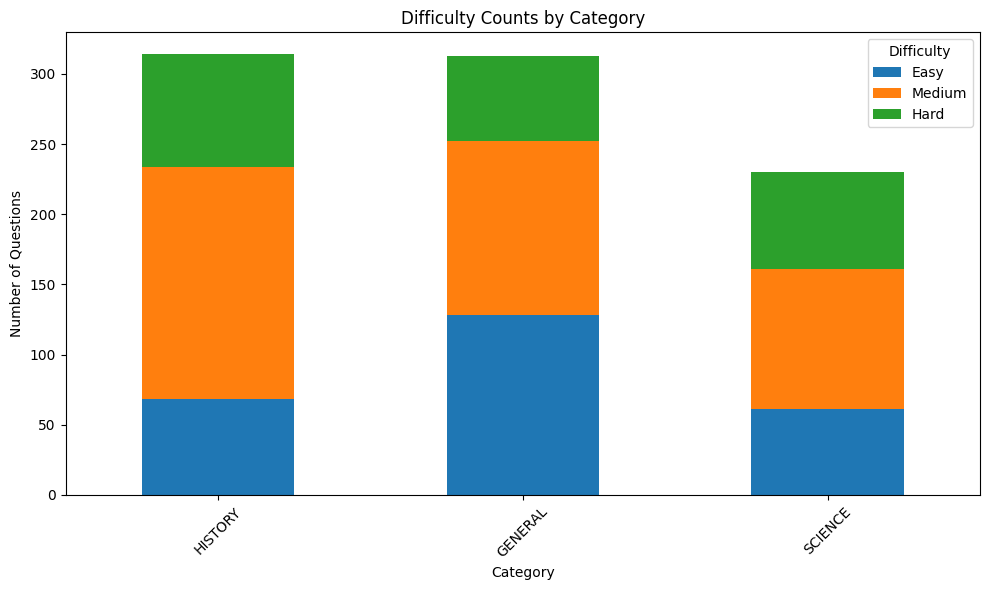

In [1]:
from collections import Counter
from file_utils import load_questions_from_file
import matplotlib.pyplot as plt
import pandas as pd

files = ["OTDB_HISTORY.json", "OTDB_GENERAL_KNOWLEDGE.json", "OTDB_SCIENCE_NATURE.json"]

difficulty_data = {"Category": [], "Easy": [], "Medium": [], "Hard": []}

for file in files:
    category = file.split("_")[1].replace(".json", "").replace("_", " ")
    questions = load_questions_from_file(file)
    difficulties = [q.difficulty for q in questions]
    counts = Counter(difficulties)

    difficulty_data["Category"].append(category)
    difficulty_data["Easy"].append(counts.get("easy", 0))
    difficulty_data["Medium"].append(counts.get("medium", 0))
    difficulty_data["Hard"].append(counts.get("hard", 0))

df = pd.DataFrame(difficulty_data)

df.set_index("Category", inplace=True)

df.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.title("Difficulty Counts by Category")
plt.xlabel("Category")
plt.ylabel("Number of Questions")
plt.xticks(rotation=45)
plt.legend(title="Difficulty")
plt.tight_layout()
plt.show()

# Asking GPT 4o

## Basic Promt

- give me 40 questions about history in easy difficulty, with each a correct answer and three incorrect answers
- give me 28 more
- give me 40 questions about history in medium difficulty, with each a correct answer and three incorrect answers
- give me 40 more
- give me 40 more
- give me 40 more
- give me 6 more
- give me 40 questions about history in hard difficulty, with each a correct answer and three incorrect answers
- give me 40 more

- give me 40 questions about general knowledge in easy difficulty, with each a correct answer and three incorrect answers
- give me 40 more
- give me 40 more
- give me 8 more
- give me 40 questions about general knowledge in medium difficulty, with each a correct answer and three incorrect answers
- give me 40 more
- give me 40 more
- give me 4 more
- give me 40 questions about general knowledge in hard difficulty, with each a correct answer and three incorrect answers
- give me 21 more

- give me 40 questions about science & nature in easy difficulty, with each a correct answer and three incorrect answers
- give me 21 more
- give me 40 questions about science & nature in medium difficulty, with each a correct answer and three incorrect answers
- give me 40 more
- give me 20 more
- give me 40 questions about science & nature in hard difficulty, with each a correct answer and three incorrect answers
- give me 29 more